In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

importing data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Renaming the columns in understandable words:

In [4]:
df = df.rename(columns={'W':'Wins', 'R':'Runs', 'AB':'At Bats', 'H':'Hits', '2B':'Doubles', '3B':'Triples', 'HR':'Homeruns', 
                   'BB':'Walks', 'SO':'Strikeouts', 'SB':'Stolen Bases', 'RA':'Runs Allowed', 'ER':'Earned Runs', 
                   'ERA':'Earned Run Average', 'CG':'Complete Games', 'SHO':'Shutouts', 'SV':'Saves', 'E':'Errors'})

In [5]:
df


,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Checking for the shape of the dataset.

In [6]:
df.shape

(30, 17)

There are 30 rows and 17 columns in the dataset including the target variable.

'Wins' is the target column.

Checking for the missing values 

In [7]:
df.isnull().sum()

Wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

There is no missing values in our dataset as per the above observations

Checking for the information of the datset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

As per the above observation all the coloumns have Integer datatype excpet Earned Run Average it ha Float datatype

Data Visualization:

Getting the relations between the 'Runs' and 'Wins'

In [9]:
df.groupby('Runs')['Wins'].mean()

Runs
573     67.0
613     71.0
622     76.0
626     63.0
640     64.0
644     80.0
647    100.0
650     74.0
655     68.0
656     76.0
661     85.0
667     92.0
669     81.0
683     90.0
689     85.5
694     68.0
696     83.5
697     98.0
703     83.0
713     81.0
720     79.0
724     95.0
729     86.0
737     68.0
748     78.0
751     88.0
764     87.0
891     93.0
Name: Wins, dtype: float64

Plotting graph to see the relation between 'Runs' and 'Wins'

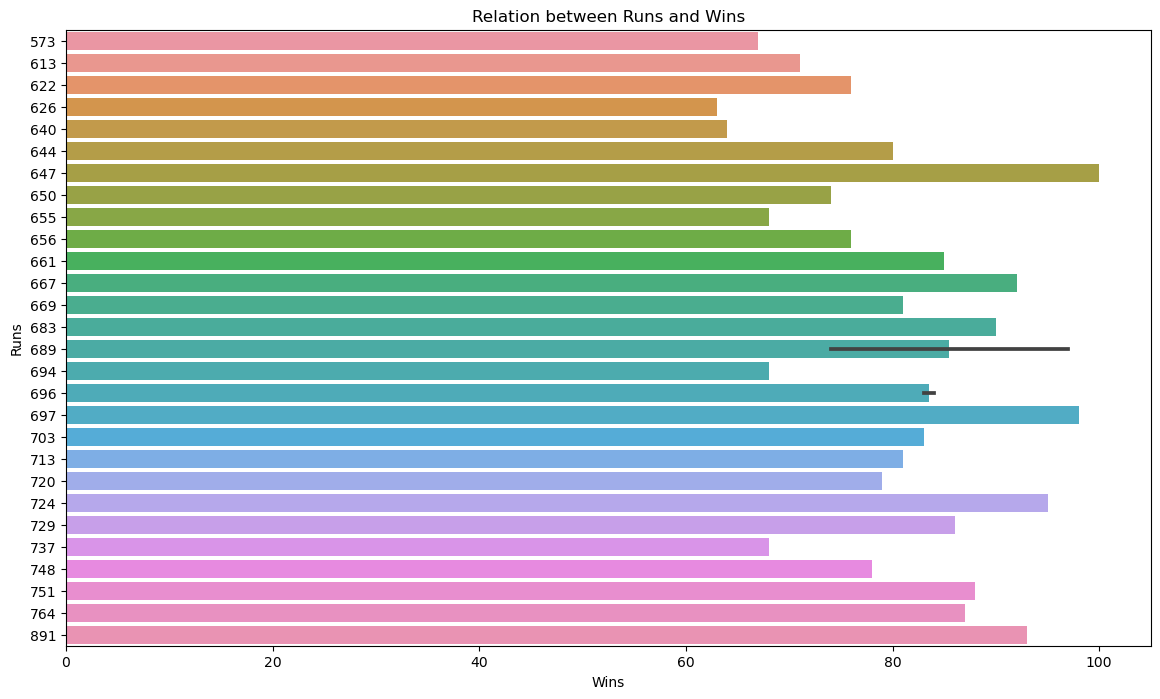

In [11]:
plt.figure(figsize=[14,8])
sns.barplot(x='Wins', y='Runs', data=df, orient='h')
plt.title('Relation between Runs and Wins')
plt.show()

As pe rthe above observation the hghest wins is of runs 647 and the lowest is 626

Similarly checked for 'At Bats' and 'Wins'

In [12]:
df.groupby('At Bats')['Wins'].mean()

At Bats
5385     92.0
5417     85.0
5420     67.0
5428     83.0
5439     81.0
5457     74.0
5459     86.0
5463     71.0
5467     83.0
5480     68.0
5484    100.0
5485     80.5
5491     97.0
5509     93.0
5511     88.0
5527     90.0
5529     63.0
5533     76.0
5544     76.0
5565     84.0
5567     87.0
5571     64.0
5572     68.0
5575     95.0
5600     68.0
5605     74.0
5631     98.0
5640     78.0
5649     79.0
Name: Wins, dtype: float64

Plotting graph to see the relation between 'At Bats' and 'Wins'

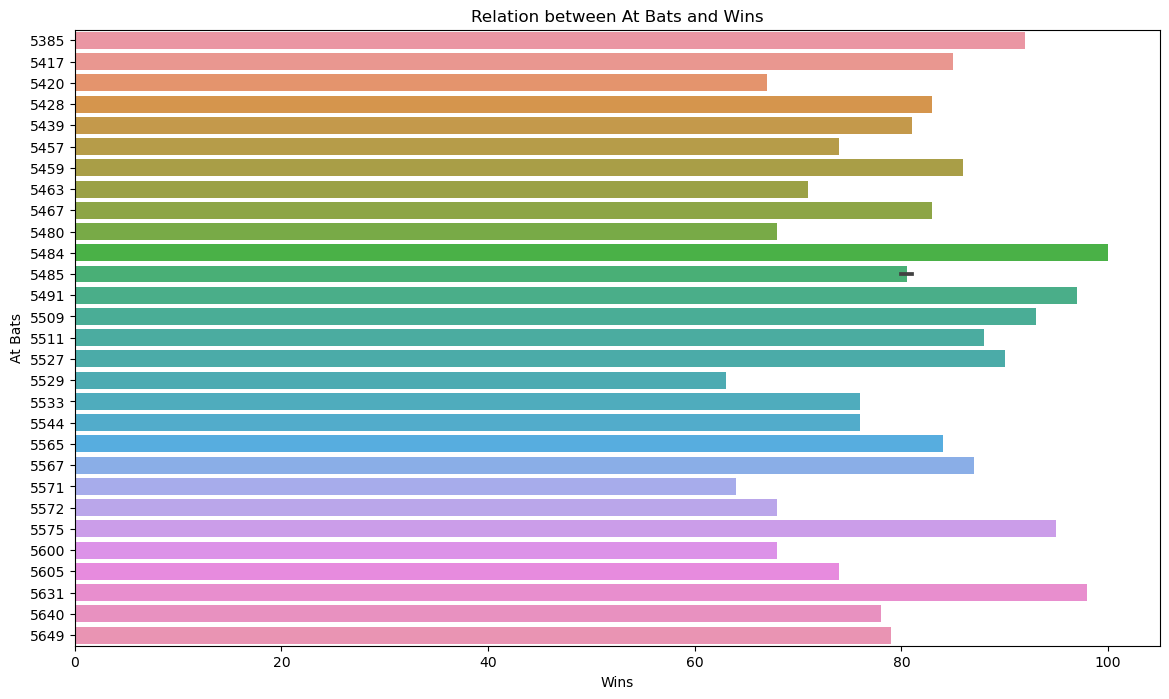

In [14]:
plt.figure(figsize=[14,8])
sns.barplot(x='Wins', y='At Bats', data=df, orient='h')
plt.title('Relation between At Bats and Wins')
plt.show()

As per the above observation the wins is highest when the 'At Bats' is 5484and the wins is lowest when the 'At Bats' is 5529.

Checkinig the description of the dataset using describe() function.

In [15]:
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Checking for the Correlation of the variables

In [16]:
df.corr()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Plotting Heatmap for correlation


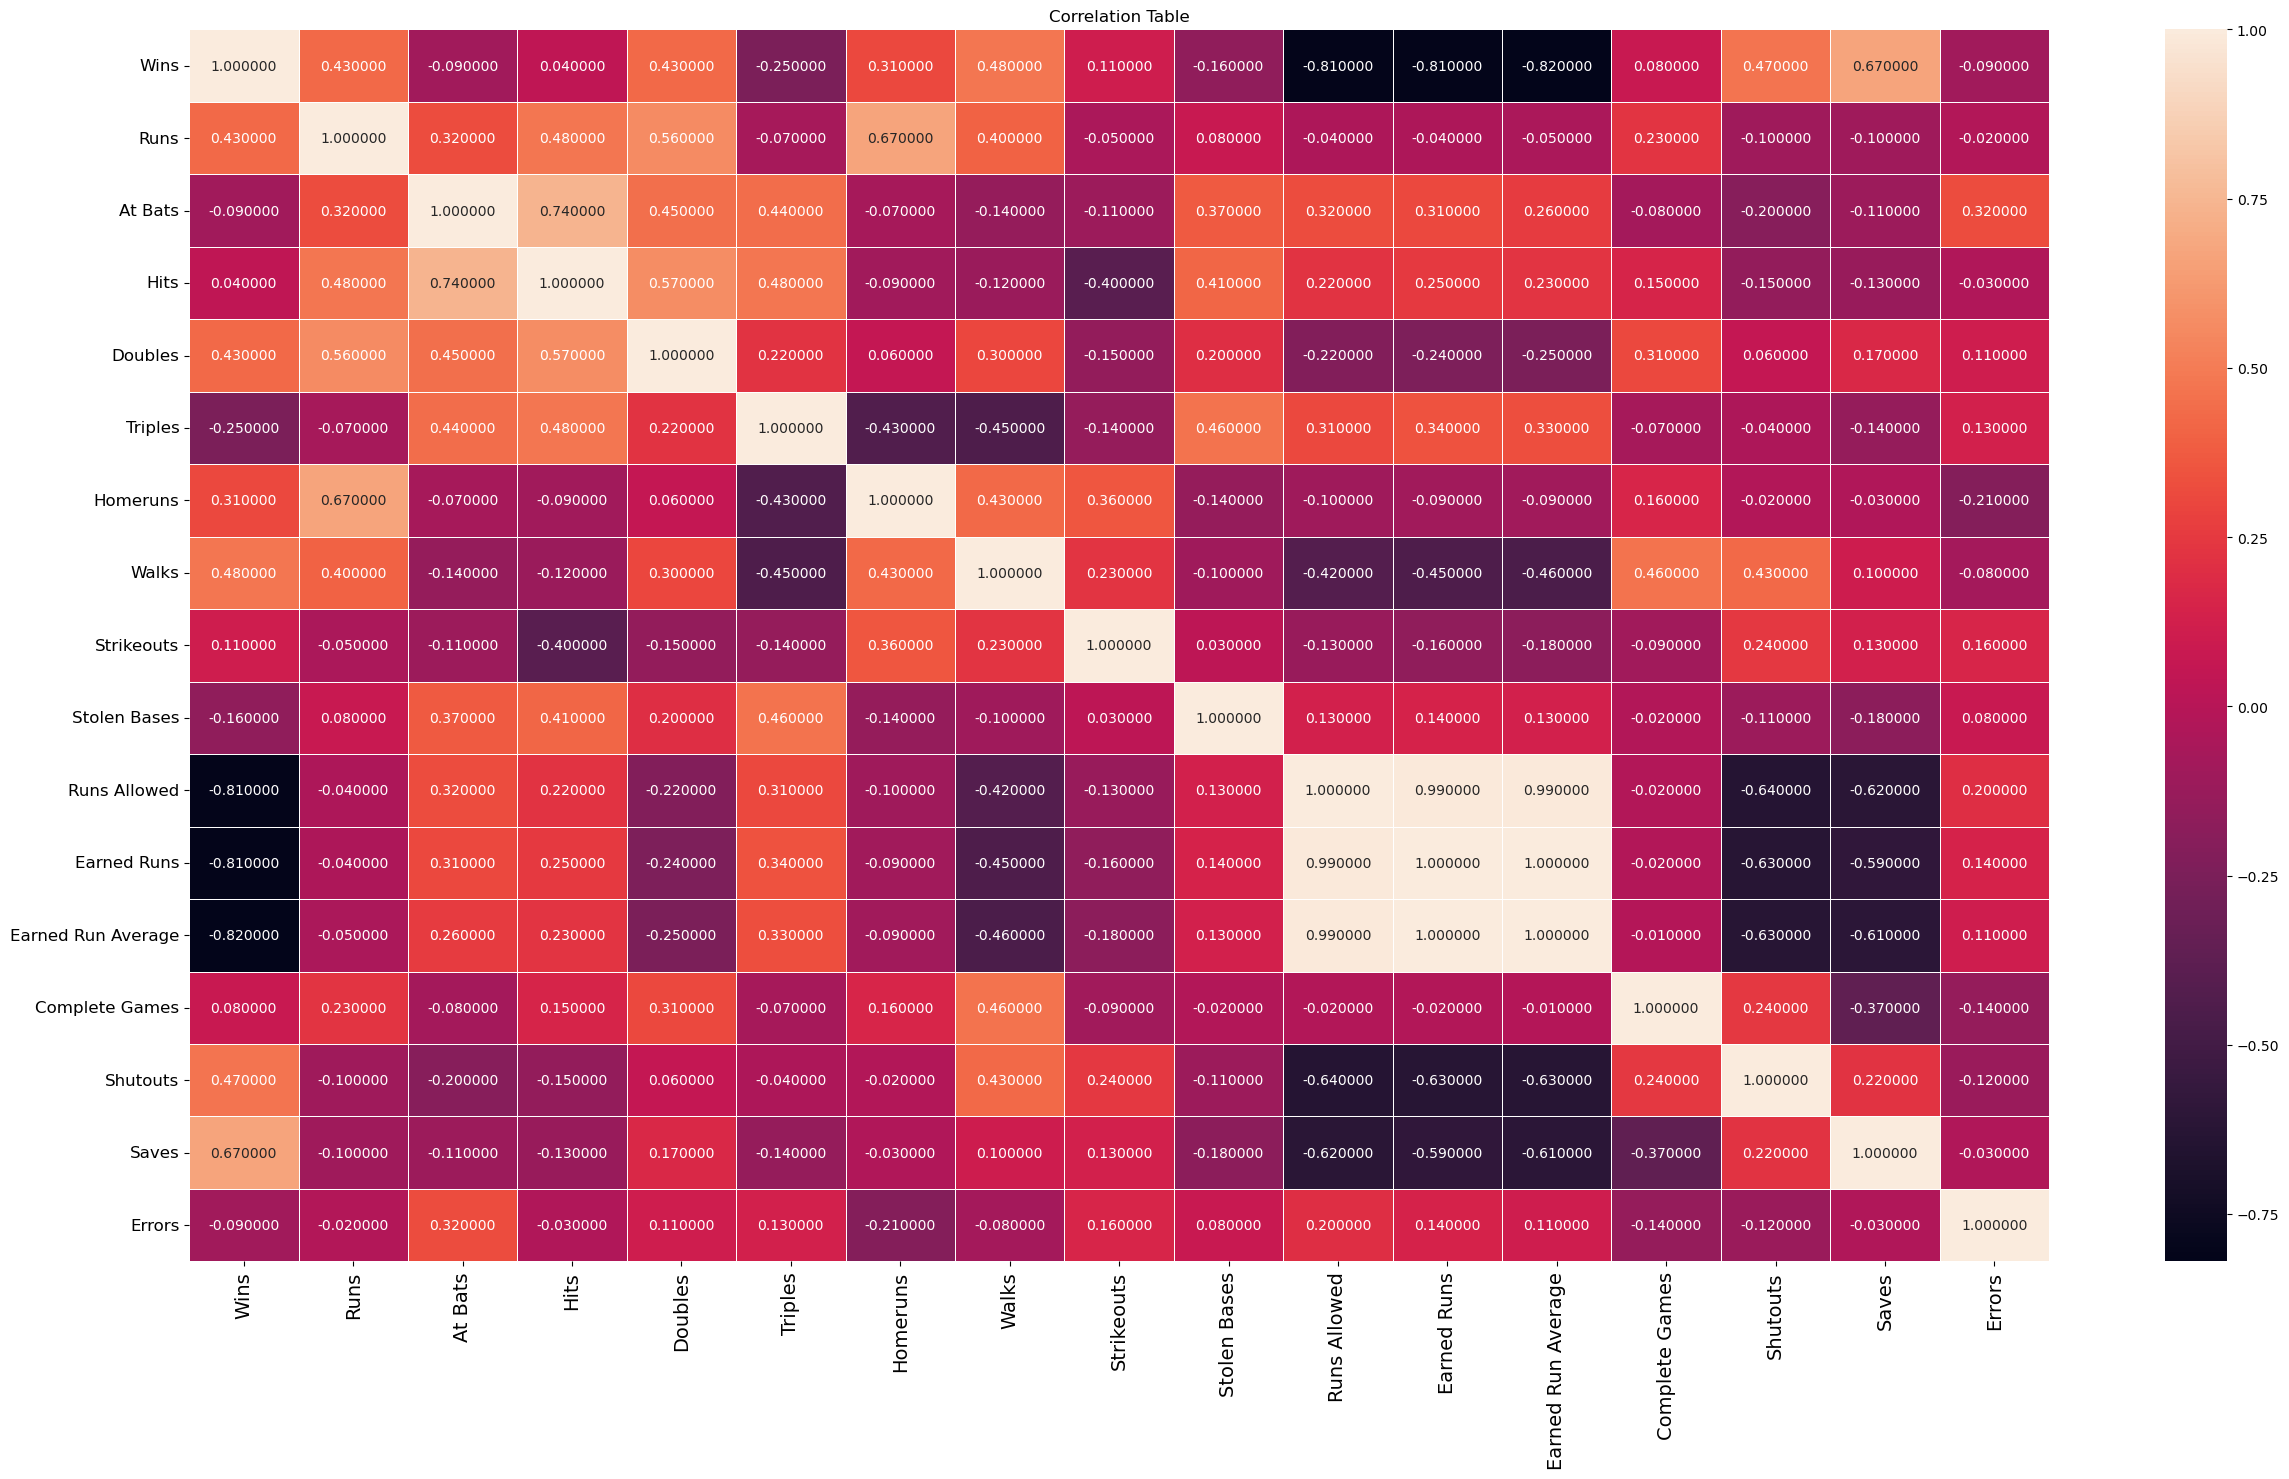

In [17]:
plt.figure(figsize=[30,16])
sns.heatmap(round(df.corr().transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

'Saves' column has the highest correlation (67%) with the target column, which can be considered as strong bond.
'Walks' column has 48% correlation with the target column, which can be considered as strong bond.
'Shutouts' column has 47% correlation with the target column, which can be considerd as strong bond.
'Earned Run Average (ERA)' has the lowest correlation -82% with the target column, which can be considered as very weak bond.
'Earned Runs' has -81% correlation with the target column which can be considered as very weak bond.
'Runs Allowed' has -81% correlation with the target column which can be considered as very weak bond.

Checking the Skewness:

In [18]:
df.skew()

Wins                  0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Games        0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

The skewness is taken as +0.5 to -0.5. The value outside this is considered as skewed.
Runs,Hits,Homeruns,Complete Games,Shutouts,Saves,Errors are skewed and rest are not

Removing outliers using zscore Technique

In [20]:
from scipy.stats import zscore

In [21]:
z = np.abs(zscore(df))
z.shape

(30, 17)

In [22]:
thershold = 3
print (np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [23]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


Checking percentage of Data lost

In [24]:
loss_per = ((30-29)/30)*100
print ('Percentage of Data Lost is: ',loss_per)

Percentage of Data Lost is:  3.3333333333333335


Removing Skewness by using power_transform

In [31]:
x = df_new.drop(['Wins'], axis=1)
y = df_new['Wins']

Data Preprocessing:

In [33]:
from sklearn.model_selection import train_test_split


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression( fit_intercept = True)


In [36]:
LR.fit(x_train, y_train)
print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")

Linear coefficients : [ 4.33732257e+00 -6.21724894e-15  2.44249065e-14 -1.67034149e+00
  1.04795831e+00 -4.40106911e-01 -1.88112960e+00 -7.64409044e-01
 -7.51289460e-01  1.98476749e+01 -1.35215749e+01 -1.21022080e+01
  2.19720648e+00  4.59206091e-01  5.49849420e+00 -1.54809197e+00]
Intercept : 80.76334910905928


In [37]:
# Predicting the new result

y_pred = LR.predict(x_test)
y_pred

array([81.30380041, 91.82504827, 78.15605337, 71.18768045, 81.03173282,
       82.63280884])